<a href="https://colab.research.google.com/github/gmdeorozco/Probability-Distribution-Problems-Python-Solutions-/blob/main/Binomial_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binomial Distribution Plots



## 1. Helper Functions

Factorial Helper Function

In [ ]:
def factorial(n):
  if n <= 1:
    return 1
  return n * factorial(n-1)

assert factorial(3) == 6, f'Incorrect 3! should be 6, returned {factorial(3)}'
assert factorial(4) == 24, f'Incorrect 4! should be 24, returned {factorial(4)}'
print('Factorial computed correctly')

Factorial computed correctly


N Choose K Helper Function

In [ ]:
def n_choose_k(n:int,k:int) -> int:
  return factorial(n)/(factorial(k)*factorial(n-k))

assert n_choose_k(10,6) == 210, f'Incorrect, C(10,6) should be 210, returned {n_choose_k(10,6)}'

Binomial Distributin given by ( note: instead of 5 it should be n, and 0,1,2 ... n):

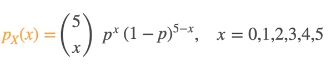

In [ ]:
def prob_given_x(n:int, x:int, p:float) -> float:
  n_choose_x = n_choose_k(n, x)
  return n_choose_x * (p**x) * (1-p)**(n-x)

assert round(prob_given_x(5, 0, 0.5),5) == 0.03125, f'Incorrect, it should be 0.03125, returned: { round(prob_given_x(5, 0, 0.5),5)}'

Create Data Function Helper

In [ ]:
def create_data(n:int,p:float) -> list:
  data = []
  for x in range(0,n+1):
    data.append( prob_given_x(n,x,p))
  return data


Plot Distribution Function

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution( data:list ) -> None:
  df = pd.DataFrame([data], columns=[ n for n in range(len(data))])

  # Transpose the DataFrame for better visualization
  df_transposed = df.transpose()

  # Plotting a histogram with Seaborn
  sns.set(style="darkgrid")
  ax = sns.barplot(x=df_transposed.index, y=df_transposed.iloc[:, 0])

  for p in ax.patches:
    ax.annotate(f'{p.get_height():.5f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

  plt.title('Distribution of Probabilities')
  plt.xlabel('Number of Heads')
  plt.ylabel('Probability')
  plt.show()





## 2. Problems:


### 2.1 Plot the Probability Distribution when fliping a coin 5 times of getting x number heads.

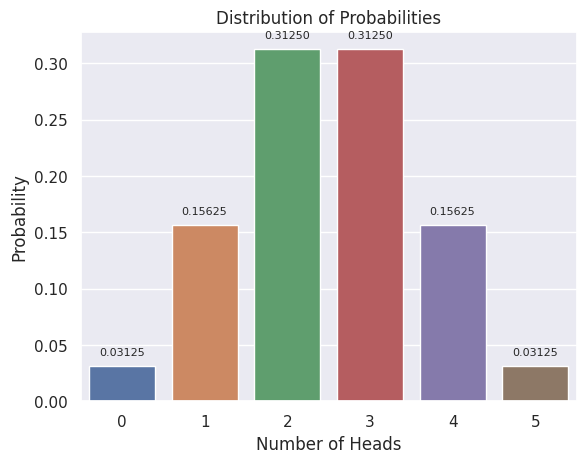

In [ ]:
data = create_data(n=5,p=0.5)
plot_distribution(data)

### 2.1 Plot the Probability Distribution when fliping a coin 5 times of getting x number heads. This time we have a bias coin that show heads only 30% of time, and not 50% as a fair coin.

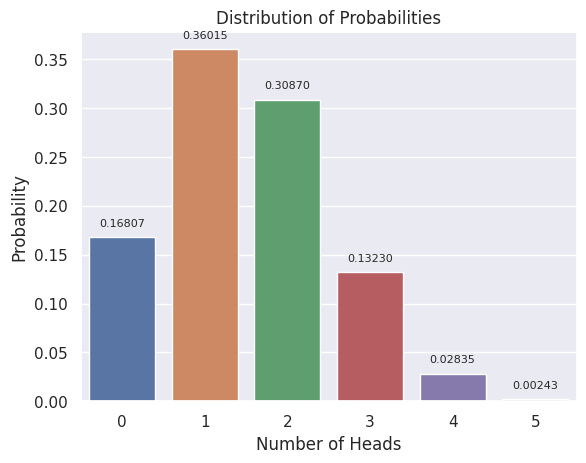

In [ ]:
data = create_data(n=5,p=0.3)
plot_distribution(data)

### 2.3 Plot the Probability Distribution when fliping a coin 10 times of getting x number heads. This with a Fair Coin




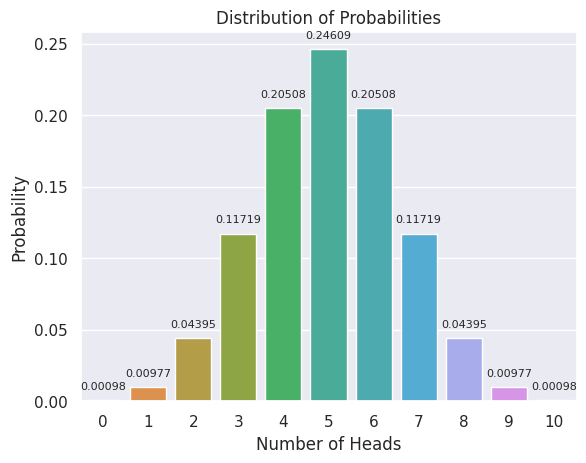

In [ ]:
data = create_data(n=10,p=0.5)
plot_distribution(data)

### 2.4 What is the probability of getting 3 ones when rolling a dice 5 times?
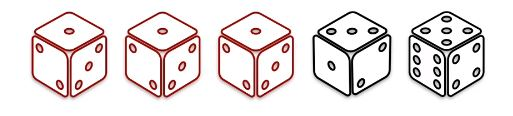



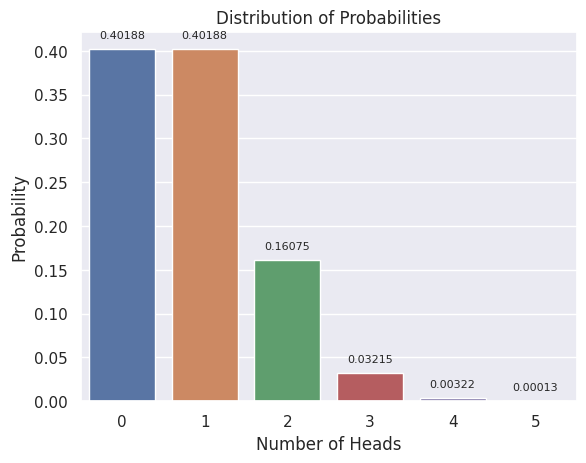

Result: the probability would be 0.03215020576131687


In [51]:
data = create_data(n=5,p=1/6)
plot_distribution(data)
prob = prob_given_x(5,3,1/6)
print(f'Result: the probability would be {prob}')